In [23]:
import os
files = os.listdir("model_finetune_cluster/new_train_data/mistral")
files


['filtered-cured-0.5_dataset.json', 'filtered_dataset.json']

total count: Counter({'wizardlm': 7177, 'flan_v2': 1621, 'dolly': 879, 'oasst1': 180, 'stanford_alpaca': 143})
total count: Counter({'wizardlm': 7247, 'flan_v2': 1604, 'dolly': 850, 'oasst1': 191, 'stanford_alpaca': 108})
total count: Counter({'wizardlm': 6418, 'flan_v2': 1962, 'dolly': 766, 'stanford_alpaca': 571, 'oasst1': 283})
total count: Counter({'wizardlm': 6019, 'flan_v2': 2124, 'dolly': 799, 'stanford_alpaca': 656, 'oasst1': 402})
total count: Counter({'wizardlm': 6832, 'flan_v2': 1387, 'dolly': 1071, 'stanford_alpaca': 608, 'oasst1': 102})
total count: Counter({'wizardlm': 6452, 'dolly': 1210, 'flan_v2': 1127, 'stanford_alpaca': 710, 'oasst1': 501})


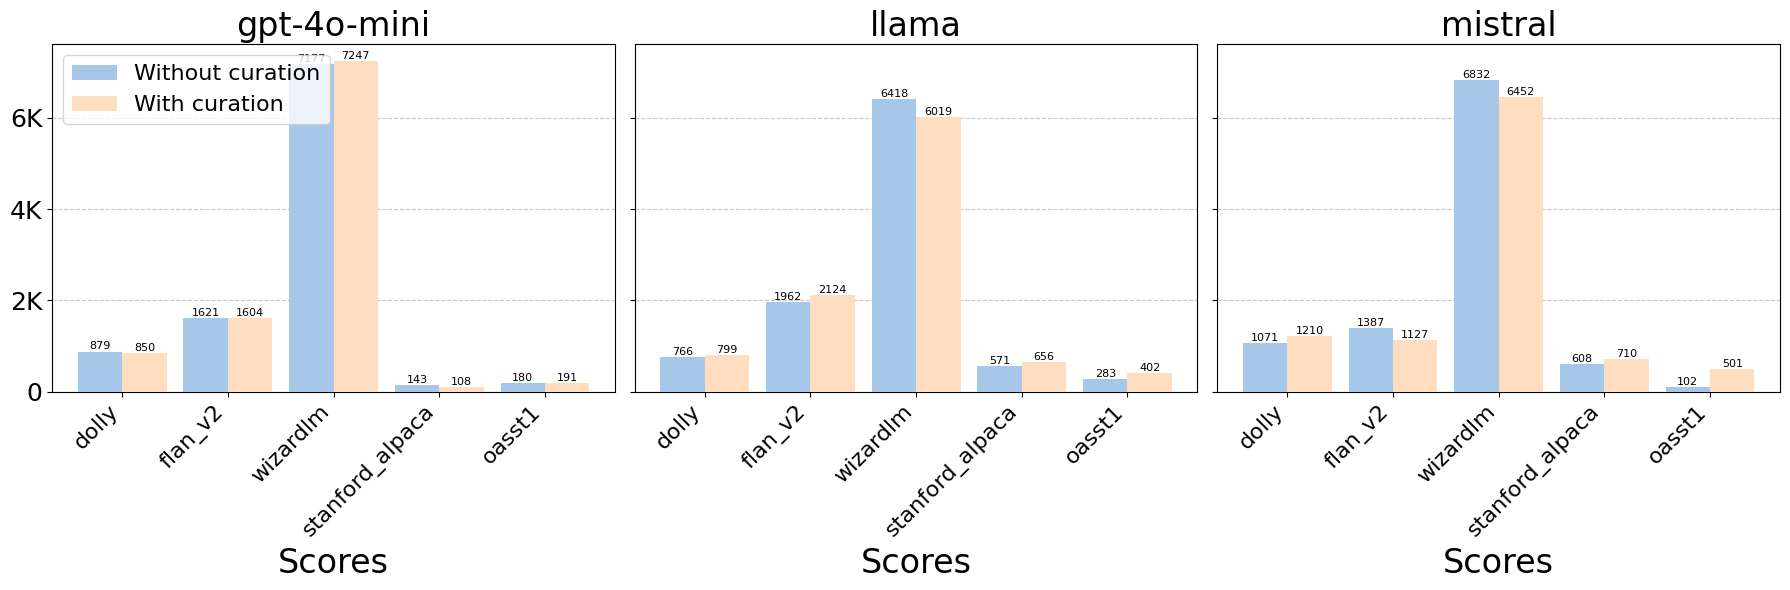

In [32]:
import os
import numpy as np
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

MODEL_LIST = ['gpt-4o-mini', 'llama', 'mistral']

root_path = "model_finetune_cluster/new_train_data/"
bar_width = 0.42  # 柱状图的宽度
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 预定义的标签顺序
sorted_labels = ['dolly', 'flan_v2',  'stanford_alpaca', 'wizardlm', 'oasst1']

for i, model_name in enumerate(MODEL_LIST):

    data_path = root_path + f"{model_name}/"
    files = os.listdir(data_path)

    for file_idx, file in enumerate(files):
        if 'cured' in file:
            data_type_tag = 'Without curation'
            color = '#A7C7E9'
        else:
            data_type_tag = 'With curation'
            color = '#FFDDC1'

        data = load_dataset('json', data_files=data_path + file)['train']
        dataset_proportion = [item.rsplit('_', 1)[0] for item in data['id']]

        # 合并 wizardlm 和 wizardlm_alpaca 到 wizardlm
        for dp_idx, item in enumerate(dataset_proportion):
            if 'wizardlm' in item:
                dataset_proportion[dp_idx] = 'wizardlm'

        counter = Counter(dataset_proportion)
        print(f"total count: {counter}")

        # 根据 sorted_labels 的顺序重排 counts
        counts = [counter[label] if label in counter else 0 for label in sorted_labels]

        # 生成 x 坐标，使用 file_idx 来偏移不同的数据集
        x = np.arange(len(sorted_labels)) + (file_idx * bar_width)

        bars = axs[i].bar(x, counts, bar_width, label=data_type_tag, color=color, zorder=3)

        # 添加柱状图上的数据标签
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    # 格式化 y 轴标签
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x * 1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x * 1e-3:.0f}K'
        else:
            return f'{x:.0f}'

    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))

    # 设置子图的标题和x轴标签
    axs[i].set_title(f'{model_name}', fontsize=24)
    axs[i].set_xlabel('Scores', fontsize=24)

    # 旋转 x 轴标签以便更好地展示
    axs[i].tick_params(axis='x', rotation=45, labelsize=16, direction='out')

    # 设置 y 轴刻度和标签
    axs[i].tick_params(axis='y', labelsize=18)

    # 设置 x 轴标签，确保所有子图顺序一致
    axs[i].set_xticks(np.arange(len(sorted_labels)) + bar_width / 2)  # 使x轴居中
    axs[i].set_xticklabels(sorted_labels, rotation=45, ha='right')  # 确保标签旋转角度和对齐方式正确

# 添加图例
axs[0].legend(loc='upper left', fontsize=16)

# 添加网格线
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()


In [ ]:
import os
import torch
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 定义模型名称和路径
models = ["gpt-4o-mini", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]
root_path = "./model_finetune_cluster/new_train_data/"

# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model_name in enumerate(models):

    # 定义两个不同路径
    path_original = root_path + f"{model_name}/all_train/output_labels_revised.pt"
    path_cured = root_path + f"{model_name}/all_train/output_labels_revised_cured.pt"

    # 加载两个不同路径下的数据
    all_labels_original = torch.load(path_original)
    all_labels_cured = torch.load(path_cured)

    if model_name == "gpt-4o-mini":
        model_name = "GPT-4o-mini"
    elif model_name == "meta-llama/Meta-Llama-3.1-8B-Instruct":
        model_name = "LlaMA-3.1-8B-Instruct"
    else:
        model_name = "Mistral-7B-Instruct-v0.3"

    # 计算两个路径下标签的计数
    label_counts_original = Counter(all_labels_original)
    label_counts_cured = Counter(all_labels_cured)

    # 获取标签和计数
    labels = list(label_counts_original.keys())  # 假设两组数据标签一致
    counts_original = [label_counts_original[label] for label in labels]
    counts_cured = [label_counts_cured[label] for label in labels]

    # 在子图中绘制两个柱状图
    bar_width = 0.42  # 柱状图的宽度

    bars_original = axs[i].bar(labels, counts_original, bar_width, label='Raw score', color='#A7C7E9', zorder=3)
    bars_cured = axs[i].bar([x + bar_width for x in labels], counts_cured, bar_width, label='Curated score', color='#FFDDC1', zorder=3)

    # 添加数据标签
    for bar in bars_original:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    for bar in bars_cured:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)
        
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x*1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x*1e-3:.0f}K'
        else:
            return f'{x:.0f}'
    
    # 使用缩写格式显示y轴刻度
    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))

    # 设置子图的标题和x轴标签
    axs[i].set_title(f'{model_name.split("/")[-1]}', fontsize=24)
    axs[i].set_xlabel('Scores', fontsize=24)

    # 旋转 x 轴标签以便更好地展示
    axs[i].tick_params(axis='x', rotation=0, labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

    y_ticks = range(0, int(max(counts_original + counts_cured) + 25000), 25000)
    axs[i].set_yticks(y_ticks)
    axs[i].tick_params(axis='y', labelsize=18)

# 设置y轴的公共标签
# fig.text(0.04, 0.5, 'Count', va='center', ha='center', fontsize=18, rotation='vertical')

# 添加图例
axs[0].legend(loc='upper left', fontsize=20)

# 添加网格线
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()


In [8]:
import torch 
from collections import Counter

labels = torch.load("label_curation/final_version_gpt_labeling_source_labels-dont_change/gpt-4o-mini-2024-08-28/wizardlm/total_output_labels.pt")
len(labels)
# Counter(labels)

/tmp/ipykernel_4169720/1071108727.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load("label_curation/final_version_gpt_labeling_source_labels-dont_chang

100000